<a href="https://colab.research.google.com/github/Anshikaa4/Project-Object-Detection-in-drones-using-openCV-and-python-/blob/main/objectdetection_with_csv_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision numpy pandas opencv-python


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [25]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def capture_image():
    js = Javascript('''
        async function captureImage() {
            const video = document.createElement('video');
            video.style.display = 'none';
            document.body.appendChild(video);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getTracks().forEach(track => track.stop());
            video.remove();

            const data = canvas.toDataURL('image/png').split(',')[1];
            return data;
        }
        captureImage();
    ''')
    data = eval_js(js)
    binary = b64decode(data)
    np_img = np.frombuffer(binary, dtype=np.uint8)
    img = cv2.imdecode(np_img, cv2.IMREAD_COLOR)
    return img

# Capture an image
img = capture_image()

# Display the captured image
cv2_imshow(img)


TypeError: <IPython.core.display.Javascript object> is not JSON serializable

In [33]:
# Step 1: Capture Image from Webcam
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab import output
from base64 import b64decode
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def capture_image():
    js = Javascript('''
        async function captureImage() {
            const video = document.createElement('video');
            const canvas = document.createElement('canvas');
            const context = canvas.getContext('2d');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(video);
            video.srcObject = stream;
            await new Promise((resolve) => video.onloadedmetadata = resolve);

            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            context.drawImage(video, 0, 0, canvas.width, canvas.height);
            stream.getTracks()[0].stop();
            video.remove();

            const data = canvas.toDataURL('image/png').split(',')[1];
            google.colab.kernel.invokeFunction('notebook.get_image', [data], {});
        }
        captureImage();
    ''')

    data = eval_js(js)
    binary = b64decode(data)
    np_img = np.frombuffer(binary, dtype=np.uint8)
    img = cv2.imdecode(np_img, cv2.IMREAD_COLOR)
    return img

# Register the callback function
output.register_callback('notebook.get_image', capture_image)

# Capture an image
# img = capture_image()

# Display the captured image
# cv2_imshow(img)

# Step 2: Install YOLOv5 Dependencies and Load Model
!pip install torch torchvision
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

import torch

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Step 3: Perform Object Detection on Captured Image
results = model(img)

# Display the image with bounding boxes
results.show()

# Step 4: Save Detection Results to CSV
import pandas as pd
from datetime import datetime
import random

# Function to simulate GPS coordinates
def get_gps_coordinates():
    latitude = random.uniform(-90.0, 90.0)
    longitude = random.uniform(-180.0, 180.0)
    return latitude, longitude

# Function to simulate direction
def get_direction():
    directions = ['N', 'S', 'E', 'W']
    return random.choice(directions)

# Function to check if an object is moving (simplified logic)
def is_moving(object_id):
    return random.choice([True, False])

# Extract detection results
detections = []
for *box, conf, cls in results.xyxy[0].tolist():
    x1, y1, x2, y2 = map(int, box)
    class_name = results.names[int(cls)]
    width = x2 - x1
    height = y2 - y1
    latitude, longitude = get_gps_coordinates()
    direction = get_direction()
    moving = is_moving(cls)
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    detections.append([timestamp, class_name, conf, x1, y1, x2, y2, width, height, moving, latitude, longitude, direction])

# Save to CSV
df = pd.DataFrame(detections, columns=['Timestamp', 'Class', 'Confidence', 'X1', 'Y1', 'X2', 'Y2', 'Width', 'Height', 'Moving', 'Latitude', 'Longitude', 'Direction'])
csv_path = 'detection_results.csv'
df.to_csv(csv_path, index=False)
print(f"Detection results saved to {csv_path}")


Cloning into 'yolov5'...
remote: Enumerating objects: 16605, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 16605 (delta 50), reused 96 (delta 43), pack-reused 16459
Receiving objects: 100% (16605/16605), 15.27 MiB | 14.89 MiB/s, done.
Resolving deltas: 100% (11356/11356), done.
/content/yolov5


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-10 Python-3.10.12 torch-2.3.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 134MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


NameError: name 'img' is not defined

In [1]:
# Install necessary libraries
!pip install torch torchvision numpy pandas opencv-python

# Import required libraries
import torch
import pandas as pd
import cv2
from IPython.display import Image, display

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Path to the input image
image_path = 'path/to/your/image.jpg'

# Read the image
image = cv2.imread(image_path)

# Perform object detection
results = model(image)

# Prepare data for CSV
detections = []
for result in results.xyxy[0].cpu().numpy():
    x1, y1, x2, y2, confidence, class_id = result
    class_name = results.names[int(class_id)]
    detections.append([class_name, confidence, int(x1), int(y1), int(x2), int(y2)])

# Save detections to a CSV file
df = pd.DataFrame(detections, columns=['Class', 'Confidence', 'X1', 'Y1', 'X2', 'Y2'])
csv_path = 'detections.csv'
df.to_csv(csv_path, index=False)

# Draw bounding boxes and labels on the image
for detection in detections:
    class_name, confidence, x1, y1, x2, y2 = detection
    label = f"{class_name} {confidence:.2f}"
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Save and display the image with detections
output_path = 'detected_image.jpg'
cv2.imwrite(output_path, image)
display(Image(filename=output_path))

# Display the CSV file
df.head()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-10 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AttributeError: 'NoneType' object has no attribute 'shape'

In [4]:
# Step 1: Capture Image from Webcam
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab import output
from base64 import b64decode
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def capture_image():
    js = Javascript('''
        async function captureImage() {
            const video = document.createElement('video');
            const canvas = document.createElement('canvas');
            const context = canvas.getContext('2d');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(video);
            video.srcObject = stream;
            await new Promise((resolve) => video.onloadedmetadata = resolve);

            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            context.drawImage(video, 0, 0, canvas.width, canvas.height);
            stream.getTracks()[0].stop();
            video.remove();

            const data = canvas.toDataURL('image/png').split(',')[1];
            google.colab.kernel.invokeFunction('notebook.get_image', [data], {});
        }
        captureImage();
    ''')

    data = eval_js(js)
    binary = b64decode(data)
    np_img = np.frombuffer(binary, dtype=np.uint8)
    img = cv2.imdecode(np_img, cv2.IMREAD_COLOR)
    return img

# Register the callback function
output.register_callback('notebook.get_image', capture_image)

# Capture an image
img = capture_image()

# Display the captured image
cv2_imshow(img)

# Step 2: Install YOLOv5 Dependencies and Load Model
!pip install torch torchvision
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

import torch

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Step 3: Perform Object Detection on Captured Image
results = model(img)

# Display the image with bounding boxes
results.show()

# Step 4: Save Detection Results to CSV
import pandas as pd
from datetime import datetime
import random

# Function to simulate GPS coordinates
def get_gps_coordinates():
    latitude = random.uniform(-90.0, 90.0)
    longitude = random.uniform(-180.0, 180.0)
    return latitude, longitude

# Function to simulate direction
def get_direction():
    directions = ['N', 'S', 'E', 'W']
    return random.choice(directions)

# Function to check if an object is moving (simplified logic)
def is_moving(object_id):
    return random.choice([True, False])

# Extract detection results
detections = []
for *box, conf, cls in results.xyxy[0].tolist():
    x1, y1, x2, y2 = map(int, box)
    class_name = results.names[int(cls)]
    width = x2 - x1
    height = y2 - y1
    latitude, longitude = get_gps_coordinates()
    direction = get_direction()
    moving = is_moving(cls)
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    detections.append([timestamp, class_name, conf, x1, y1, x2, y2, width, height, moving, latitude, longitude, direction])

# Save to CSV
df = pd.DataFrame(detections, columns=['Timestamp', 'Class', 'Confidence', 'X1', 'Y1', 'X2', 'Y2', 'Width', 'Height', 'Moving', 'Latitude', 'Longitude', 'Direction'])
csv_path = 'detection_results.csv'
df.to_csv(csv_path, index=False)
print(f"Detection results saved to {csv_path}")


TypeError: <IPython.core.display.Javascript object> is not JSON serializable

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


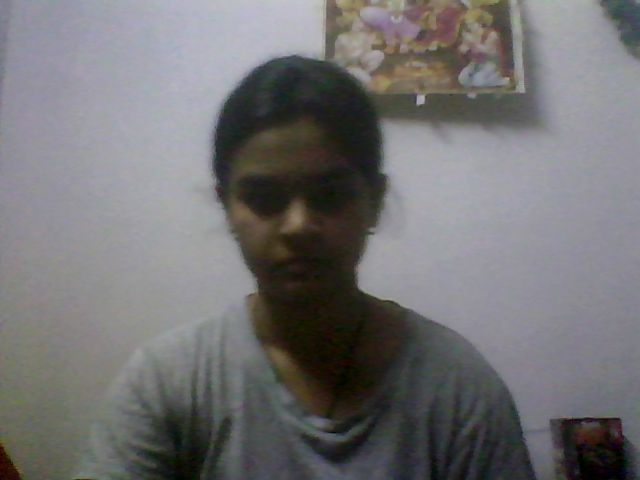

In [10]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-10 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


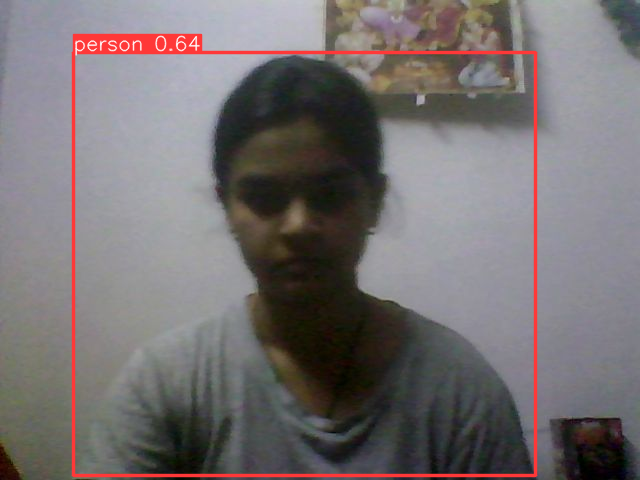

Detection results saved to detection_results.csv


In [11]:
import torch

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Step 3: Perform Object Detection on Captured Image
results = model('photo.jpg')

# Display the image with bounding boxes
results.show()

# Step 4: Save Detection Results to CSV
import pandas as pd
from datetime import datetime
import random

# Function to simulate GPS coordinates
def get_gps_coordinates():
    latitude = random.uniform(-90.0, 90.0)
    longitude = random.uniform(-180.0, 180.0)
    return latitude, longitude

# Function to simulate direction
def get_direction():
    directions = ['N', 'S', 'E', 'W']
    return random.choice(directions)

# Function to check if an object is moving (simplified logic)
def is_moving(object_id):
    return random.choice([True, False])

# Extract detection results
detections = []
for *box, conf, cls in results.xyxy[0].tolist():
    x1, y1, x2, y2 = map(int, box)
    class_name = results.names[int(cls)]
    width = x2 - x1
    height = y2 - y1
    latitude, longitude = get_gps_coordinates()
    direction = get_direction()
    moving = is_moving(cls)
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    detections.append([timestamp, class_name, conf, x1, y1, x2, y2, width, height, moving, latitude, longitude, direction])

# Save to CSV
df = pd.DataFrame(detections, columns=['Timestamp', 'Class', 'Confidence', 'X1', 'Y1', 'X2', 'Y2', 'Width', 'Height', 'Moving', 'Latitude', 'Longitude', 'Direction'])
csv_path = 'detection_results.csv'
df.to_csv(csv_path, index=False)
print(f"Detection results saved to {csv_path}")